In [1]:
import numpy as np
import pandas as pd
import time
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset

uber_df = pd.read_csv('E:/AI + ML Training Incedo/Uber case study/Uber Request Data.csv')
uber_df.rename(columns={'Driver id': 'Driver_id'}, inplace=True)
uber_df['Request_timestamp'] = uber_df['Request_timestamp'].map(lambda x: str(x).replace("/","-"))
uber_df['Drop_timestamp'] = uber_df['Drop_timestamp'].map(lambda x: str(x).replace("/","-"))
uber_df['Request_timestamp'] = pd.to_datetime(uber_df['Request_timestamp'],dayfirst=True)
uber_df['Drop_timestamp'] = pd.to_datetime(uber_df['Drop_timestamp'],dayfirst=True)

In [3]:
print(uber_df.shape)
uber_df

(6745, 6)


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


In [4]:
print("No of null values in Request_id:",uber_df.Request_id.isnull().sum())
print("No of null values in Pickup_point:",uber_df.Pickup_point.isnull().sum())
print("No of null values in Driver id:",uber_df.Driver_id.isnull().sum())
print("No of null values in Status:",uber_df.Status.isnull().sum())
print("No of null values in Request_timestamp:",uber_df.Request_timestamp.isnull().sum())
print("No of null values in Drop_timestamp:",uber_df.Drop_timestamp.isnull().sum())

No of null values in Request_id: 0
No of null values in Pickup_point: 0
No of null values in Driver id: 2650
No of null values in Status: 0
No of null values in Request_timestamp: 0
No of null values in Drop_timestamp: 3914


In [5]:
print("No of null values in Driver id for No cars available status:",uber_df[uber_df['Status']=='No Cars Available'].Driver_id.isnull().sum())

No of null values in Driver id for No cars available status: 2650


In [6]:
pd.value_counts(uber_df['Status'])

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [7]:
pd.value_counts(uber_df.Pickup_point)

City       3507
Airport    3238
Name: Pickup_point, dtype: int64

In [8]:
uber_df.groupby((['Pickup_point','Status']),as_index=False)['Request_id'].count()

,Pickup_point,Status,Request_id
0,Airport,Cancelled,198
1,Airport,No Cars Available,1713
2,Airport,Trip Completed,1327
3,City,Cancelled,1066
4,City,No Cars Available,937
5,City,Trip Completed,1504


In [9]:
# Creating time duration varaible to calculate time difference
uber_df['Trip_duration'] = (uber_df['Drop_timestamp'] - uber_df['Request_timestamp']).astype('timedelta64[m]')
uber_df

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Trip_duration
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,31.0
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,57.0
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,56.0
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,53.0
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,39.0


In [10]:
uber_df['Request_Year']=[d.year for d in uber_df.Request_timestamp]
uber_df['Request_Month']=[d.month for d in uber_df.Request_timestamp]
uber_df['Request_Day']=[d.day for d in uber_df.Request_timestamp]
uber_df['Req_hour'] = uber_df['Request_timestamp'].dt.hour
uber_df['Req_day'] = uber_df['Request_timestamp'].dt.day

uber_df

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Trip_duration,Request_Year,Request_Month,Request_Day,Req_hour,Req_day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,2016,7,11,11,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,2016,7,11,17,11
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,2016,7,12,9,12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,2016,7,12,21,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0,2016,7,13,8,13
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,31.0,2016,7,13,21,13
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,57.0,2016,7,14,6,14
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,56.0,2016,7,15,5,15
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,53.0,2016,7,15,17,15
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,39.0,2016,7,11,6,11


In [11]:
# Time Binning
uber_df['Session'] = pd.cut(uber_df.Req_hour,[0,6,12,16,21,24],labels=['Late_Night','Morning','Afternoon','Evening','Night'])
uber_df

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Trip_duration,Request_Year,Request_Month,Request_Day,Req_hour,Req_day,Session
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.0,2016,7,11,11,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.0,2016,7,11,17,11,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.0,2016,7,12,9,12,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.0,2016,7,12,21,12,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.0,2016,7,13,8,13,Morning
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,31.0,2016,7,13,21,13,Evening
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,57.0,2016,7,14,6,14,Late_Night
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,56.0,2016,7,15,5,15,Late_Night
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,53.0,2016,7,15,17,15,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,39.0,2016,7,11,6,11,Late_Night


In [12]:
uber_df.groupby((['Session']))['Request_id'].count()

Session
Late_Night    1322
Morning       1858
Afternoon      626
Evening       2342
Night          498
Name: Request_id, dtype: int64

In [13]:
uber_df.groupby((['Session','Status']))['Request_id'].count()

Session     Status           
Late_Night  Cancelled             383
            No Cars Available     413
            Trip Completed        526
Morning     Cancelled             618
            No Cars Available     386
            Trip Completed        854
Afternoon   Cancelled              72
            No Cars Available     184
            Trip Completed        370
Evening     Cancelled             166
            No Cars Available    1392
            Trip Completed        784
Night       Cancelled              22
            No Cars Available     219
            Trip Completed        257
Name: Request_id, dtype: int64

In [14]:
uber_df.groupby((['Req_day','Status']),as_index=False)['Request_id'].count()

,Req_day,Status,Request_id
0,11,Cancelled,262
1,11,No Cars Available,504
2,11,Trip Completed,601
3,12,Cancelled,240
4,12,No Cars Available,505
5,12,Trip Completed,562
6,13,Cancelled,270
7,13,No Cars Available,490
8,13,Trip Completed,577
9,14,Cancelled,252


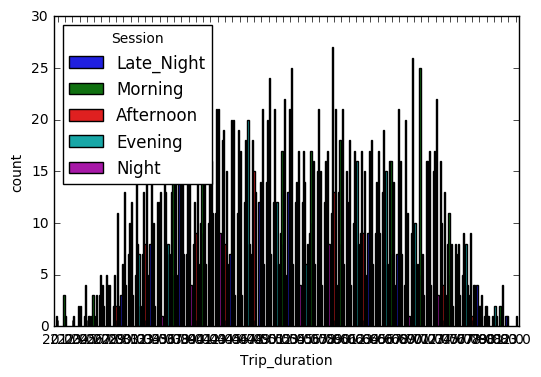

In [15]:
sns.countplot(x='Trip_duration',hue='Session',data=uber_df)
plt.show()

In [16]:
uber_df.Request_id.nunique()

6745